# PART- 3 `( Outlier Handling )`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df_car = pd.read_csv("df_car_filled.csv")

In [3]:
def groupby_mode2(group_col1, group_col2, fill_col):
    for group1 in list(df_car[group_col1].unique()):
        cond1 = (df_car[group_col1]==group1)
        
        for group2 in list(df_car[group_col2].unique()):
            cond2 = (df_car[group_col2]==group2)
            cond = (cond1 & cond2)
            
            mode2 = list(df_car[cond][fill_col].mode())
            
            if mode2 != []:
                df_car.loc[cond,fill_col] = df_car.loc[cond,fill_col].fillna(mode2[0])
            elif list(df_car[cond1][fill_col].mode()) != []:
                df_car.loc[cond,fill_col] = df_car.loc[cond,fill_col].fillna(df_car[cond1][fill_col].mode()[0])
            else:
                df_car.loc[cond,fill_col] = df_car.loc[cond,fill_col].fillna(df_car[fill_col].mode()[0])
    print("Number of NaN : ",df_car[fill_col].isnull().sum())
    print("------------------")
    print(df_car[fill_col].value_counts(dropna=False))

def fill_most(df, group_col, col_name):
    '''Fills the missing values with the most existing value (mode) in the relevant column according to single-stage grouping'''
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[col_name].mode()[0])
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [4]:
df_car.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
km,56013.0,80000.0,83450.0,73000.0,16200.0
car_age,3.0,2.0,3.0,3.0,3.0
prev_owner,2.0,1.0,1.0,1.0,1.0
horse_power,66.0,141.0,85.0,66.0,66.0
color,Black,Red,Black,Brown,Black
paint_type,Metallic,Metallic,Metallic,Metallic,Metallic
gears,7.0,7.0,7.0,6.0,7.0


##  ``car_price``

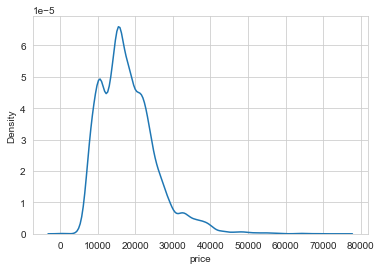

In [5]:
sns.kdeplot(df_car.price);

<AxesSubplot:xlabel='price'>

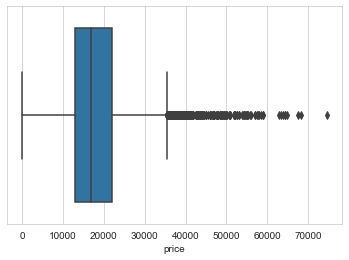

In [6]:
sns.boxplot(df_car.price)

## ``km``

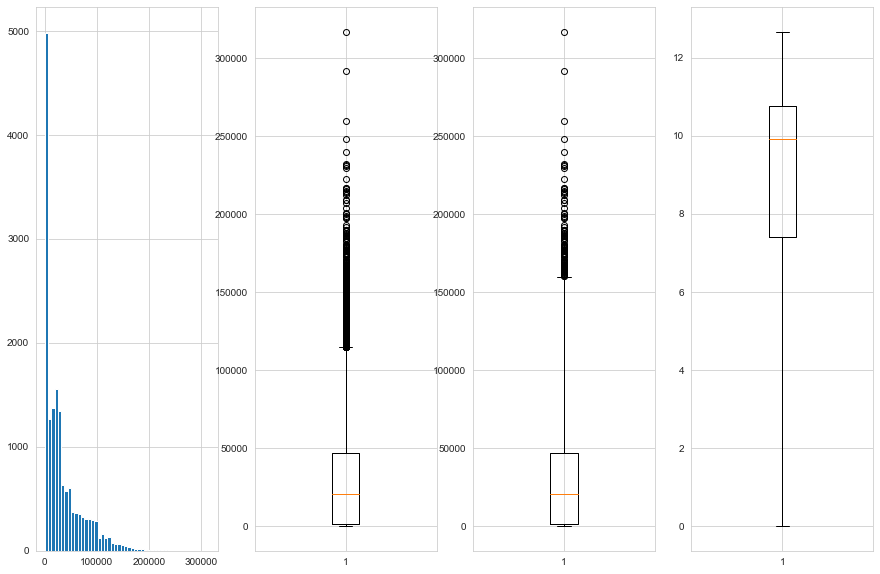

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(141)
plt.hist(df_car.km, bins = 50)

plt.subplot(142)
plt.boxplot(df_car.km)

plt.subplot(143)
plt.boxplot(df_car.km, whis = 2.5)

plt.subplot(144)
plt.boxplot(np.log(df_car.km), whis = 2.5)
plt.show()

## ``horse_power``

In [8]:
df_car.horse_power.describe()

count   15919.000
mean       88.388
std        26.828
min         1.000
25%        66.000
50%        85.000
75%       101.000
max       294.000
Name: horse_power, dtype: float64

In [9]:
df_car[df_car.horse_power < 40].index

Int64Index([ 3913,  6005,  6034,  6946,  7014,  7016,  7018,  7019,  9285,
             9287,  9288,  9289,  9290,  9292,  9299, 10468, 10579, 10580,
            10610, 13885, 15155, 15156],
           dtype='int64')

In [10]:
df_car.loc[df_car.horse_power < 40,'horse_power'] = df_car.horse_power.mean()

In [11]:
df_car.horse_power.describe()

count   15919.000
mean       88.508
std        26.632
min        40.000
25%        66.000
50%        85.000
75%       101.000
max       294.000
Name: horse_power, dtype: float64

## ``nr_of_doors``

In [12]:
df_car['nr_of_doors'].sort_values()

13782   1.000
1811    2.000
1228    2.000
1229    2.000
1230    2.000
         ... 
6172    5.000
6173    5.000
6175    5.000
15918   5.000
15202   7.000
Name: nr_of_doors, Length: 15919, dtype: float64

In [13]:
df_car['nr_of_doors'].replace([1,7],np.nan,inplace=True)

In [14]:
groupby_mode2('make_model','body_type','nr_of_doors')

Number of NaN :  0
------------------
5.000    11789
4.000     3079
3.000      832
2.000      219
Name: nr_of_doors, dtype: int64


In [15]:
df_car['nr_of_doors'].value_counts()

5.000    11789
4.000     3079
3.000      832
2.000      219
Name: nr_of_doors, dtype: int64

## ``nr_of_seats``

In [16]:
df_car['nr_of_seats'].value_counts()

5.000    14308
4.000     1127
7.000      362
2.000      119
6.000        2
3.000        1
Name: nr_of_seats, dtype: int64

In [17]:
df_car[df_car['nr_of_seats'] == 3]['make_model']

1636    Audi A1
Name: make_model, dtype: object

In [18]:
df_car['nr_of_seats'].replace([3],5,inplace=True)

## ``displacement``

In [19]:
df_car['displacement'].value_counts()

1600.000     5384
1400.000     3109
1000.000     2587
1500.000     1476
1200.000     1246
2000.000     1164
900.000       372
1100.000      289
1800.000      211
0.000          38
2500.000       20
100.000         7
200.000         6
1300.000        3
1900.000        2
1700.000        2
15900.000       1
3000.000        1
16000.000       1
Name: displacement, dtype: int64

In [20]:
df_car['displacement'].replace([0,100,200,15900,16000],np.nan,inplace=True)

In [21]:
groupby_mode2('make_model','body_type','displacement')

Number of NaN :  0
------------------
1600.000    5417
1400.000    3114
1000.000    2587
1500.000    1491
1200.000    1246
2000.000    1164
900.000      372
1100.000     289
1800.000     211
2500.000      20
1300.000       3
1900.000       2
1700.000       2
3000.000       1
Name: displacement, dtype: int64


## ``cylinders``

In [22]:
df_car.cylinders.value_counts(dropna=False)

4.000    12413
3.000     3476
5.000       22
6.000        3
8.000        2
2.000        2
1.000        1
Name: cylinders, dtype: int64

In [23]:
df_car['cylinders'].replace([1,2,6,8],np.nan,inplace=True)

In [24]:
groupby_mode2('make_model','displacement','cylinders')

Number of NaN :  0
------------------
4.000    12420
3.000     3477
5.000       22
Name: cylinders, dtype: int64


## ``weight_kg``

In [25]:
df_car['weight_kg'].sort_values().head()

8355      1.000
12779     1.000
1143    102.000
8857    840.000
14313   900.000
Name: weight_kg, dtype: float64

In [26]:
df_car['weight_kg'].replace([1,102],np.nan,inplace=True)

In [27]:
groupby_mode2('make_model','body_type','weight_kg')

Number of NaN :  0
------------------
1163.000    1583
1360.000    1406
1487.000     958
1135.000     828
1425.000     731
            ... 
1797.000       1
1950.000       1
900.000        1
1272.000       1
1159.000       1
Name: weight_kg, Length: 432, dtype: int64


## ``co2_emission``

In [28]:
df_car['co2_emission'].value_counts().sort_index().head(10)

0.000     2
1.000     2
5.000     3
12.000    4
13.000    1
14.000    2
36.000    3
45.000    1
51.000    1
80.000    1
Name: co2_emission, dtype: int64

In [29]:
df_car['co2_emission'].describe()

count   15919.000
mean      117.435
std        19.707
min         0.000
25%       104.000
50%       117.000
75%       128.000
max       990.000
Name: co2_emission, dtype: float64

In [30]:
cond = ((df_car['co2_emission'] < 52) | (df_car['co2_emission'] > 330))
df_car.loc[cond, "co2_emission"] = np.nan

In [31]:
groupby_mode2('make_model','displacement','co2_emission')

Number of NaN :  0
------------------
120.000    1124
97.000      785
99.000      739
114.000     679
119.000     656
           ... 
239.000       1
171.000       1
184.000       1
253.000       1
193.000       1
Name: co2_emission, Length: 108, dtype: int64


## ``consump_country``

In [32]:
df_car['consump_country'].value_counts().sort_index().head(10)

0.300       1
2.900       1
3.100     707
3.200     180
3.300     702
3.400     353
3.500     525
3.600     540
3.700    1394
3.800     945
Name: consump_country, dtype: int64

In [33]:
df_car['consump_country'].replace([0.3,2.9],np.nan,inplace=True)
groupby_mode2('make_model','displacement','consump_country')

Number of NaN :  0
------------------
4.200    1563
3.700    1394
4.400    1325
3.900    1185
4.500    1105
3.800     945
4.700     849
4.900     755
4.100     740
3.100     707
3.300     702
4.600     633
3.600     540
3.500     525
4.300     525
5.300     370
3.400     353
4.800     341
5.700     242
5.400     239
5.100     235
3.200     180
5.600     154
5.200     118
6.300      52
5.500      36
5.800      30
7.700      20
6.600      19
6.400      15
7.300       4
6.500       4
7.100       3
5.900       2
6.100       2
7.800       2
6.700       2
7.600       1
8.600       1
6.900       1
Name: consump_country, dtype: int64


## ``consump_city``

In [34]:
df_car.consump_city.value_counts().sort_index().head(10)

0.100      2
0.200     21
0.400      1
0.800      3
1.200      4
1.300     19
1.500      4
3.300     30
3.400     50
3.500    439
Name: consump_city, dtype: int64

In [35]:
df_car.consump_city.value_counts().sort_index().tail(10)

8.800     2
8.900     4
9.100    12
9.200    34
9.400    14
9.500     3
9.600    42
9.700     1
9.800     5
9.900    16
Name: consump_city, dtype: int64

In [36]:
cond = ((df_car['consump_city'] < 3) )
df_car.loc[cond, "consump_city"] = np.nan

In [37]:
groupby_mode2('make_model','displacement','consump_city')

Number of NaN :  0
------------------
5.100    1263
5.900    1107
4.500     963
7.800     830
5.700     820
5.800     753
7.300     614
6.700     597
4.300     532
6.800     517
7.200     495
5.400     448
3.500     439
4.600     417
5.200     416
6.300     412
7.500     366
4.200     353
6.600     352
4.100     320
4.700     289
7.100     260
7.600     251
3.900     245
6.200     227
6.900     223
5.500     216
7.700     205
8.700     182
7.400     179
6.500     167
6.100     153
8.200     143
6.400     143
4.400     135
5.600     107
7.900     101
5.300     101
4.800      72
4.900      58
3.700      53
3.400      50
9.600      42
8.600      42
8.300      41
8.500      39
9.200      34
3.300      30
3.800      26
8.100      25
9.900      16
9.400      14
9.100      12
8.400       7
9.800       5
8.900       4
9.500       3
3.600       2
8.800       2
9.700       1
Name: consump_city, dtype: int64


## ``consump_comb``

In [38]:
df_car.consump_comb.value_counts().sort_index().head(10)

1.200      1
1.600      3
3.100      7
3.200     25
3.300    467
3.400    113
3.500    285
3.600    230
3.650     19
3.700    387
Name: consump_comb, dtype: int64

In [39]:
df_car.consump_comb.value_counts().sort_index().tail(10)

7.550     2
7.600    14
7.800     6
7.850     1
7.900     3
8.100     2
8.300    19
8.600     4
8.700     3
9.100     1
Name: consump_comb, dtype: int64

In [40]:
cond = ((df_car['consump_comb'] < 3) )
df_car.loc[cond, "consump_comb"] = np.nan

In [41]:
groupby_mode2('make_model','displacement','consump_comb')

Number of NaN :  0
------------------
4.500    1039
5.400     852
4.100     813
5.600     752
3.900     751
         ... 
5.550       1
7.850       1
5.000       1
9.100       1
4.450       1
Name: consump_comb, Length: 86, dtype: int64


## ``gears``

In [42]:
df_car['gears'].value_counts()

6.000    8617
5.000    4255
7.000    2810
8.000     224
9.000       6
4.000       2
1.000       2
3.000       2
2.000       1
Name: gears, dtype: int64

In [43]:
df_car['gears'].replace([1,3,2],np.nan,inplace=True)
groupby_mode2('make_model','displacement','gears')

Number of NaN :  0
------------------
6.000    8621
5.000    4256
7.000    2810
8.000     224
9.000       6
4.000       2
Name: gears, dtype: int64


# Final Steps

In [44]:
df_car.columns

Index(['make_model', 'body_type', 'price', 'km', 'car_age', 'prev_owner',
       'horse_power', 'color', 'paint_type', 'gears', 'safety_security',
       'type', 'upholstery', 'nr_of_doors', 'nr_of_seats', 'gearing_type',
       'displacement', 'cylinders', 'weight_kg', 'drive_chain', 'fuel',
       'consump_comb', 'consump_city', 'consump_country', 'co2_emission',
       'comfort_convenience', 'media', 'extras'],
      dtype='object')

In [45]:
df_car.to_csv('final_scout_not_dummy.csv',index=False)

Using get_dummies

In [46]:
df_car = df_car.join(df_car['comfort_convenience'].str.get_dummies(sep = ',').add_prefix('cc_'))
df_car = df_car.join(df_car['media'].str.get_dummies(sep = ',').add_prefix('med_'))
df_car = df_car.join(df_car['extras'].str.get_dummies(sep = ',').add_prefix('ex_'))
df_car = df_car.join(df_car['safety_security'].str.get_dummies(sep = ',').add_prefix('ss_'))

In [47]:
df_car.info

<bound method DataFrame.info of            make_model body_type  price        km  car_age  prev_owner  \
0             Audi A1    Sedans  15770 56013.000    3.000       2.000   
1             Audi A1    Sedans  14500 80000.000    2.000       1.000   
2             Audi A1    Sedans  14640 83450.000    3.000       1.000   
3             Audi A1    Sedans  14500 73000.000    3.000       1.000   
4             Audi A1    Sedans  16790 16200.000    3.000       1.000   
...               ...       ...    ...       ...      ...         ...   
15914  Renault Espace       Van  39950  1611.101    0.000       0.000   
15915  Renault Espace       Van  39885  9900.000    0.000       1.000   
15916  Renault Espace       Van  39875    15.000    0.000       1.000   
15917  Renault Espace       Van  39700    10.000    0.000       0.000   
15918  Renault Espace       Van  40999  1611.101    0.000       1.000   

       horse_power  color paint_type  gears  ... ss_led headlights  \
0           66.000  B

In [48]:
df_car.drop(['comfort_convenience','media','extras','safety_security'], axis = 1, inplace = True)

In [49]:
df_car.shape

(15919, 118)

In [50]:
df_car_final = pd.get_dummies(df_car,drop_first=True)

In [51]:
df_car_final.shape

(15919, 162)

In [52]:
df_car_final.isnull().sum().sum()

0

In [53]:
df_car_final.columns.to_list()

['price',
 'km',
 'car_age',
 'prev_owner',
 'horse_power',
 'gears',
 'nr_of_doors',
 'nr_of_seats',
 'displacement',
 'cylinders',
 'weight_kg',
 'consump_comb',
 'consump_city',
 'consump_country',
 'co2_emission',
 'cc_Air conditioning',
 'cc_Air suspension',
 'cc_Armrest',
 'cc_Automatic climate control',
 'cc_Auxiliary heating',
 'cc_Cruise control',
 'cc_Electric Starter',
 'cc_Electric tailgate',
 'cc_Electrical side mirrors',
 'cc_Electrically adjustable seats',
 'cc_Electrically heated windshield',
 'cc_Heads-up display',
 'cc_Heated steering wheel',
 'cc_Hill Holder',
 'cc_Keyless central door lock',
 'cc_Leather seats',
 'cc_Leather steering wheel',
 'cc_Light sensor',
 'cc_Lumbar support',
 'cc_Massage seats',
 'cc_Multi-function steering wheel',
 'cc_Navigation system',
 'cc_Panorama roof',
 'cc_Park Distance Control',
 'cc_Parking assist system camera',
 'cc_Parking assist system self-steering',
 'cc_Parking assist system sensors front',
 'cc_Parking assist system sensor

In [54]:
df_car_final.to_csv('df_car_final.csv')